Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Import the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [21]:
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [22]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

Feature scaling

In [24]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()
#each part should have their own scaler object so that the calculations be correct:
x_scaled = scaler_x.fit_transform(x)
y_scaled = scaler_y.fit_transform(y.reshape(len(y), 1))
#Y should be reshaped because standard scaler needs a 2D array to work

In [25]:
y_scaled

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [26]:
x_scaled

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

Training the SVR model

In [27]:
from sklearn.svm import SVR
model = SVR(kernel='rbf')
#kernel = Radial Basis Function(is a type of kernel used in support vector machines)
model.fit(x_scaled, y_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Predicting a new result

In [32]:
#we cant put 6.5 dicectly into model.predict. why?
#because our model was trained on scaled data! we have to input
#the scaled value of 6.5 into our model:
prediction = [6.5]
new_pre = scaler_x.transform([prediction])

In [33]:
model.predict(new_pre)

array([-0.27861589])

In [44]:
# inverse transform:
# we dont know what -0.278 means! because our model was trained to output scaled information.
# so we have to inverse that out put into real values. we use the same scaler we used earlier
# on y to inverse transform the output:
last_pre = scaler_y.inverse_transform(model.predict(new_pre).reshape(-1,1))
last_pre

array([[170370.0204065]])

Visualizing the SVR results

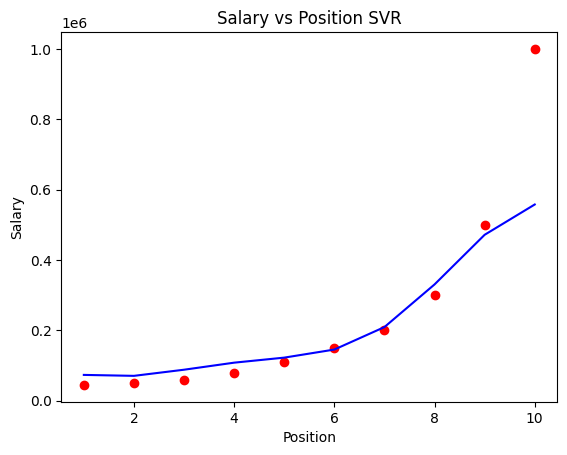

In [43]:
plt.scatter(x,y,color='red')
plt.plot(x,scaler_y.inverse_transform(model.predict(x_scaled).reshape(-1,1)),color='blue')
plt.title('Salary vs Position SVR')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()